In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import scipy.interpolate as interp
import pandas as pd
from helpers import *

# ensure the notebook generate the same randomess
np.random.seed(1)


### Sprawdzenie

In [2]:
N = 2
R = [10**3,10**5, 10**7]

In [3]:
PoA = []
for r in R: 
    v = np.random.uniform(0,1,(r,N))
    b = bet_Bayes_Nash_all(N, v)

    auctioneer_utility = [sum(bi) for bi in b]
    winner_index=np.argmax(b, axis=1)
    winner_utility = v[np.arange(r), winner_index] - b[np.arange(r), winner_index]
    Welf = v[np.arange(r), winner_index]
    Opt =v.max(axis = 1)
    PoA.append(np.mean(Welf/Opt))

pd.DataFrame({"R":R, 'PoA':PoA})

,R,PoA
0,1000,1.0
1,100000,1.0
2,10000000,1.0


### Oferty z rozkładu U(0,1)

In [4]:
n = 100
r = 10000

In [5]:
PoA_mean, PoA_min = generate_nPoA(r, n, bet_Bayes_Nash_all, bet_random, args_equi = [], args_dist = [])

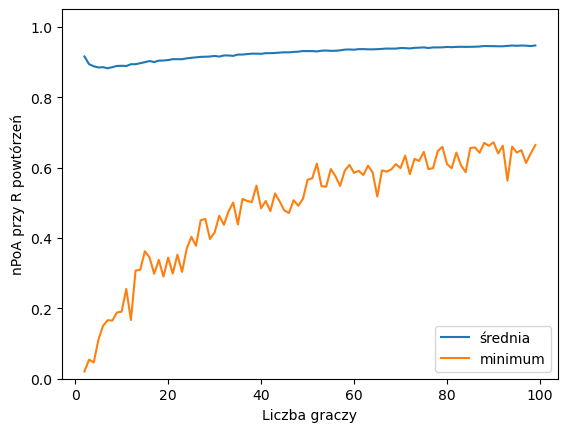

In [6]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.savefig('pictures/uniform/uniform_all_pay.png')

### Oferty z normalnego z overbettingiem

In [7]:
PoA_mean, PoA_min = generate_nPoA(r, n, bet_Bayes_Nash_all, bet_normal, args_equi = [], args_dist = [0])

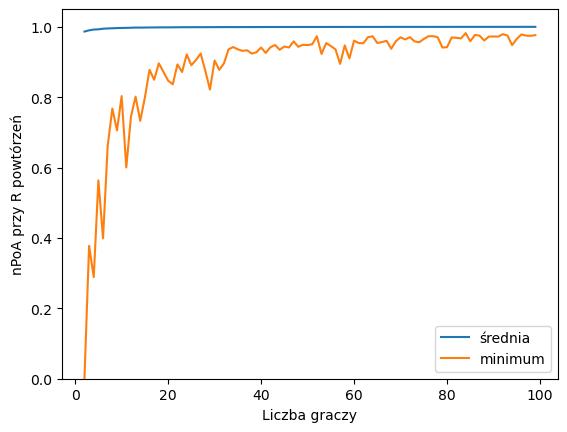

In [8]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.savefig('pictures/all_pay/normal_overbetting.png')

### Oferty z normalnego bez overbettingu

In [9]:
PoA_mean, PoA_min = generate_nPoA(r, n, bet_Bayes_Nash_all, bet_normal, args_equi = [], args_dist = [1])

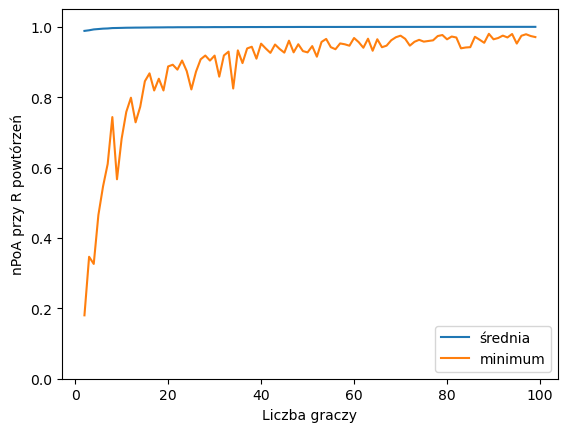

In [10]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.savefig('pictures/all_pay/normal_no_overbetting.png')

In [11]:
PoA_mean, PoA_min = generate_nPoA(r, n, bet_Bayes_Nash_all, draw_beta_dist, args_equi = [], args_dist = [])

C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: divide by zero encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode
C:\Users\bniew\PycharmProjects\PriceOfAnarchyAuctions\helpers.py:43: RuntimeWarning: overflow encountered in divide
  b = (a * (1-mode)-1+2*mode)/mode


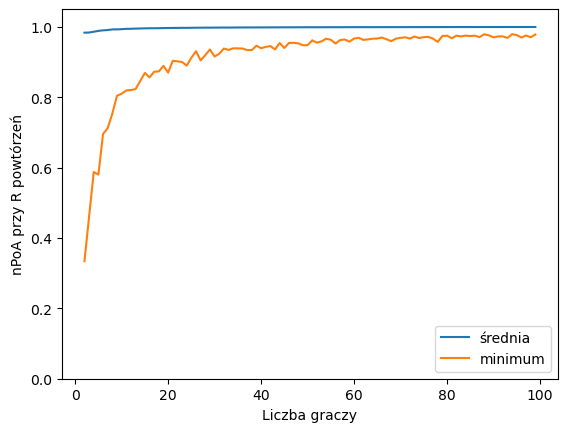

In [12]:
fig, ax = plt.subplots()
x = list(range(2,n))
ax.plot(x,PoA_mean, label = 'średnia')
ax.plot(x,PoA_min, label = 'minimum')
plt.xlabel("Liczba graczy")
plt.ylabel("nPoA przy R powtórzeń")
ax.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.savefig('pictures/all_pay/beta.png')